In [19]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [22]:
CLIENT_ID = 'KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K' # your Foursquare ID
CLIENT_SECRET = '5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K
CLIENT_SECRET:5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO


In [23]:
address = 'New York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

40.7127281 -74.0060152


In [24]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' .... OK!')

Restaurant .... OK!


In [25]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=KRNFNYQSKYWYID2KTYSCQ4QHQNMGZE5ZZWTRVDVI5MME003K&client_secret=5PGEBCXDRXMAHQ1Z2QYK5BK2UWXUEG5MHN1DLB2PXLNDLTUO&ll=40.7127281,-74.0060152&v=20180604&query=Restaurant&radius=5000&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5def52bf95feaf001b1c66ad'},
 'response': {'venues': [{'id': '3fd66200f964a520d5e31ee3',
    'name': 'Jing Fong Restaurant 金豐大酒樓',
    'location': {'address': '20 Elizabeth St',
     'crossStreet': 'btwn Bayard & Canal St',
     'lat': 40.7158812029412,
     'lng': -73.99720861552515,
     'labeledLatLngs': [{'label': 'display',
       'lat': 40.7158812029412,
       'lng': -73.99720861552515}],
     'distance': 821,
     'postalCode': '10013',
     'cc': 'US',
     'city': 'New York',
     'state': 'NY',
     'country': 'United States',
     'formattedAddress': ['20 Elizabeth St (btwn Bayard & Canal St)',
      'New York, NY 10013',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d1f5931735',
      'name': 'Dim Sum Restaurant',
      'pluralName': 'Dim Sum Restaurants',
      'shortName': 'Dim Sum',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/dimsum_',
       'suffix': '.png'},
      'primary': True}],
   

In [27]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,...,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",296411,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/jing-fong-restau...,False,3fd66200f964a520d5e31ee3,20 Elizabeth St,...,"[20 Elizabeth St (btwn Bayard & Canal St), New...","[{'label': 'display', 'lat': 40.7158812029412,...",40.715881,-73.997209,NaN,10013,NY,Jing Fong Restaurant 金豐大酒樓,v-1575965431,89860853
1,"[{'id': '4bf58dd8d48988d11b941735', 'name': 'P...",NaN,NaN,NaN,NaN,NaN,NaN,False,49f125dcf964a52091691fe3,120 Cedar St,...,"[120 Cedar St (at Greenwich St.), New York, NY...","[{'label': 'display', 'lat': 40.70989378141622...",40.709894,-74.012836,NaN,10006,NY,O'Hara's Restaurant & Pub,v-1575965431,93216281
2,"[{'id': '4bf58dd8d48988d1f5931735', 'name': 'D...",NaN,NaN,NaN,NaN,NaN,NaN,False,3fd66200f964a520ece31ee3,18 E Broadway,...,"[18 E Broadway (at Catherine St), New York, NY...","[{'label': 'display', 'lat': 40.71362850464683...",40.713629,-73.997230,NaN,10002,NY,Golden Unicorn Restaurant 麒麟金閣,v-1575965431,72966848
3,"[{'id': '4bf58dd8d48988d14c941735', 'name': 'W...",299726,/delivery_provider_seamless_20180129.png,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",seamless,https://www.seamless.com/menu/mudville-restaur...,False,45e5c256f964a52046431fe3,126 Chambers St,...,[126 Chambers St (btwn W Broadway & Church St)...,"[{'label': 'display', 'lat': 40.71533575723845...",40.715336,-74.008881,NaN,10007,NY,Mudville Restaurant & Tap House,v-1575965431,43156651
4,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",NaN,NaN,NaN,NaN,NaN,NaN,False,4a00df67f964a520ba701fe3,80 Bayard St,...,"[80 Bayard St (at Mott St), New York, NY 10013...","[{'label': 'display', 'lat': 40.71569636637641...",40.715696,-73.998667,NaN,10013,NY,Bo Ky Restaurant 波記潮州小食,v-1575965431,NaN


In [28]:
dataframe.shape

(50, 25)

In [29]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,20 Elizabeth St,US,New York,United States,btwn Bayard & Canal St,821,"[20 Elizabeth St (btwn Bayard & Canal St), New...","[{'label': 'display', 'lat': 40.7158812029412,...",40.715881,-73.997209,NaN,10013,NY,3fd66200f964a520d5e31ee3
1,O'Hara's Restaurant & Pub,Pub,120 Cedar St,US,New York,United States,at Greenwich St.,656,"[120 Cedar St (at Greenwich St.), New York, NY...","[{'label': 'display', 'lat': 40.70989378141622...",40.709894,-74.012836,NaN,10006,NY,49f125dcf964a52091691fe3
2,Golden Unicorn Restaurant 麒麟金閣,Dim Sum Restaurant,18 E Broadway,US,New York,United States,at Catherine St,748,"[18 E Broadway (at Catherine St), New York, NY...","[{'label': 'display', 'lat': 40.71362850464683...",40.713629,-73.997230,NaN,10002,NY,3fd66200f964a520ece31ee3
3,Mudville Restaurant & Tap House,Wings Joint,126 Chambers St,US,New York,United States,btwn W Broadway & Church St,377,[126 Chambers St (btwn W Broadway & Church St)...,"[{'label': 'display', 'lat': 40.71533575723845...",40.715336,-74.008881,NaN,10007,NY,45e5c256f964a52046431fe3
4,Bo Ky Restaurant 波記潮州小食,Chinese Restaurant,80 Bayard St,US,New York,United States,at Mott St,702,"[80 Bayard St (at Mott St), New York, NY 10013...","[{'label': 'display', 'lat': 40.71569636637641...",40.715696,-73.998667,NaN,10013,NY,4a00df67f964a520ba701fe3
5,TJ Byrnes Bar and Restaurant,Restaurant,77 Fulton St,US,New York,United States,Gold St,433,"[77 Fulton St (Gold St), New York, NY 10038, U...","[{'label': 'display', 'lat': 40.70923312629616...",40.709233,-74.003747,NaN,10038,NY,4b4fdfc8f964a520801827e3
6,Deluxe Green Bo Restaurant,Chinese Restaurant,66 Bayard St,US,New York,United States,btwn Elizabeth & Mott St,734,"[66 Bayard St (btwn Elizabeth & Mott St), New ...","[{'label': 'display', 'lat': 40.71554491813315...",40.715545,-73.998137,NaN,10013,NY,3fd66200f964a520ceea1ee3
7,Amore's Pizza Restaurant,Pizza Place,147 Chambers St,US,New York,United States,Hudson Street,477,"[147 Chambers St (Hudson Street), New York, NY...","[{'label': 'display', 'lat': 40.71585960614924...",40.715860,-74.009888,NaN,10007,NY,4bc238adf8219c744286b410
8,Galli Restaurant,Italian Restaurant,45 Mercer St,US,New York,United States,Broome & Grand Streets,1067,"[45 Mercer St (Broome & Grand Streets), New Yo...","[{'label': 'display', 'lat': 40.72160721760932...",40.721607,-74.001235,NaN,10013,NY,5018507fe4b03a729d0b40f9
9,Hop Shing Restaurant 合誠茶樓,Dim Sum Restaurant,9 Chatham Sq,US,New York,United States,at E Broadway,695,"[9 Chatham Sq (at E Broadway), New York, NY 10...","[{'label': 'display', 'lat': 40.713932, 'lng':...",40.713932,-73.997930,NaN,10038,NY,4b38c437f964a520245025e3


In [30]:
dataframe_filtered.name

0                  Jing Fong Restaurant 金豐大酒樓
1                   O'Hara's Restaurant & Pub
2              Golden Unicorn Restaurant 麒麟金閣
3             Mudville Restaurant & Tap House
4                     Bo Ky Restaurant 波記潮州小食
5                TJ Byrnes Bar and Restaurant
6                  Deluxe Green Bo Restaurant
7                    Amore's Pizza Restaurant
8                            Galli Restaurant
9                   Hop Shing Restaurant 合誠茶樓
10              Nam Son Vietnamese Restaurant
11                 Chatham Seafood Restaurant
12                       Acqua Restaurant NYC
13                         Waverly Restaurant
14    Wing Kee WK Restaurant 榮記飯店 (former 69)
15                          Puglia Restaurant
16                     Sun Sai Gai Restaurant
17        Clinton St. Baking Co. & Restaurant
18                        Junior's Restaurant
19                             218 Restaurant
20                         Sanuria Restaurant
21                 J.J. Noodle Res

In [31]:
New_York_map = folium.Map(location=[40.7127281, -74.0060152], zoom_start=13)

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(New_York_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(New_York_map)

# display map
New_York_map

In [32]:
New York_map = folium.Map(location=[40.7127281,-74.0060152], zoom_start=15) # generate map centred around Riyadh 



SyntaxError: invalid syntax (<ipython-input-32-62c4b23fcb66>, line 1)

In [33]:
dataframe_filtered.count ()

name                50
categories          49
address             50
cc                  50
city                50
country             50
crossStreet         43
distance            50
formattedAddress    50
labeledLatLngs      50
lat                 50
lng                 50
neighborhood         2
postalCode          50
state               50
id                  50
dtype: int64

In [34]:
gp = dataframe_filtered.groupby('categories')
gp

In [35]:
gp.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,20 Elizabeth St,US,New York,United States,btwn Bayard & Canal St,821,"[20 Elizabeth St (btwn Bayard & Canal St), New...","[{'label': 'display', 'lat': 40.7158812029412,...",40.715881,-73.997209,NaN,10013,NY,3fd66200f964a520d5e31ee3
1,O'Hara's Restaurant & Pub,Pub,120 Cedar St,US,New York,United States,at Greenwich St.,656,"[120 Cedar St (at Greenwich St.), New York, NY...","[{'label': 'display', 'lat': 40.70989378141622...",40.709894,-74.012836,NaN,10006,NY,49f125dcf964a52091691fe3
2,Golden Unicorn Restaurant 麒麟金閣,Dim Sum Restaurant,18 E Broadway,US,New York,United States,at Catherine St,748,"[18 E Broadway (at Catherine St), New York, NY...","[{'label': 'display', 'lat': 40.71362850464683...",40.713629,-73.997230,NaN,10002,NY,3fd66200f964a520ece31ee3
3,Mudville Restaurant & Tap House,Wings Joint,126 Chambers St,US,New York,United States,btwn W Broadway & Church St,377,[126 Chambers St (btwn W Broadway & Church St)...,"[{'label': 'display', 'lat': 40.71533575723845...",40.715336,-74.008881,NaN,10007,NY,45e5c256f964a52046431fe3
4,Bo Ky Restaurant 波記潮州小食,Chinese Restaurant,80 Bayard St,US,New York,United States,at Mott St,702,"[80 Bayard St (at Mott St), New York, NY 10013...","[{'label': 'display', 'lat': 40.71569636637641...",40.715696,-73.998667,NaN,10013,NY,4a00df67f964a520ba701fe3
5,TJ Byrnes Bar and Restaurant,Restaurant,77 Fulton St,US,New York,United States,Gold St,433,"[77 Fulton St (Gold St), New York, NY 10038, U...","[{'label': 'display', 'lat': 40.70923312629616...",40.709233,-74.003747,NaN,10038,NY,4b4fdfc8f964a520801827e3
6,Deluxe Green Bo Restaurant,Chinese Restaurant,66 Bayard St,US,New York,United States,btwn Elizabeth & Mott St,734,"[66 Bayard St (btwn Elizabeth & Mott St), New ...","[{'label': 'display', 'lat': 40.71554491813315...",40.715545,-73.998137,NaN,10013,NY,3fd66200f964a520ceea1ee3
7,Amore's Pizza Restaurant,Pizza Place,147 Chambers St,US,New York,United States,Hudson Street,477,"[147 Chambers St (Hudson Street), New York, NY...","[{'label': 'display', 'lat': 40.71585960614924...",40.715860,-74.009888,NaN,10007,NY,4bc238adf8219c744286b410
8,Galli Restaurant,Italian Restaurant,45 Mercer St,US,New York,United States,Broome & Grand Streets,1067,"[45 Mercer St (Broome & Grand Streets), New Yo...","[{'label': 'display', 'lat': 40.72160721760932...",40.721607,-74.001235,NaN,10013,NY,5018507fe4b03a729d0b40f9
9,Hop Shing Restaurant 合誠茶樓,Dim Sum Restaurant,9 Chatham Sq,US,New York,United States,at E Broadway,695,"[9 Chatham Sq (at E Broadway), New York, NY 10...","[{'label': 'display', 'lat': 40.713932, 'lng':...",40.713932,-73.997930,NaN,10038,NY,4b38c437f964a520245025e3


In [36]:
dataframe_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
categories,,,,,,,,,,,,,,,
American Restaurant,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2
Asian Restaurant,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Bakery,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Cantonese Restaurant,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Chinese Restaurant,16,16,16,16,16,13,16,16,16,16,16,0,16,16,16
Dim Sum Restaurant,4,4,4,4,4,4,4,4,4,4,4,0,4,4,4
Diner,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2
German Restaurant,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
Italian Restaurant,5,5,5,5,5,5,5,5,5,5,5,0,5,5,5


In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Matplotlib version:  3.0.2


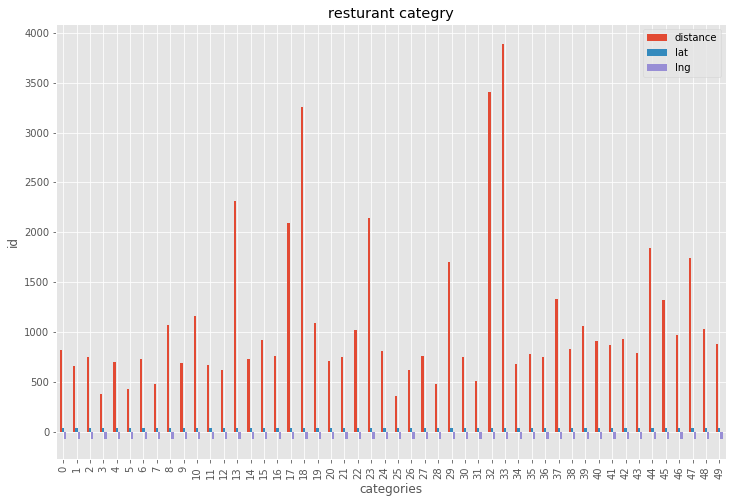

In [38]:
# step 2: plot data
dataframe_filtered.plot(kind='bar', figsize=(12, 8))

plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant categry') # add title to the plot

plt.show()

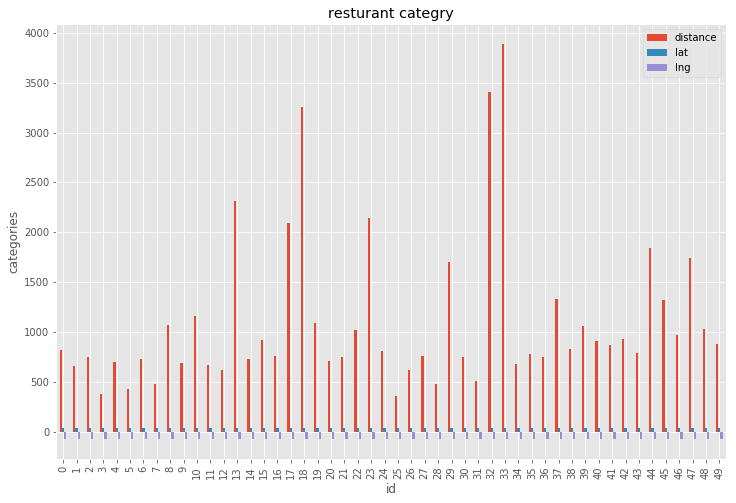

In [39]:
# step 2: plot data
dataframe_filtered.plot(kind='bar', figsize=(12, 8))

plt.xlabel('id') # add to x-label to the plot
plt.ylabel('categories') # add y-label to the plot
plt.title('resturant categry') # add title to the plot

plt.show()

In [41]:

df=dataframe_filtered[['categories','id']]
df



,categories,id
0,Dim Sum Restaurant,3fd66200f964a520d5e31ee3
1,Pub,49f125dcf964a52091691fe3
2,Dim Sum Restaurant,3fd66200f964a520ece31ee3
3,Wings Joint,45e5c256f964a52046431fe3
4,Chinese Restaurant,4a00df67f964a520ba701fe3
5,Restaurant,4b4fdfc8f964a520801827e3
6,Chinese Restaurant,3fd66200f964a520ceea1ee3
7,Pizza Place,4bc238adf8219c744286b410
8,Italian Restaurant,5018507fe4b03a729d0b40f9
9,Dim Sum Restaurant,4b38c437f964a520245025e3


In [50]:
df.groupby('categories').count()

,id
categories,
American Restaurant,2
Asian Restaurant,1
Bakery,1
Cantonese Restaurant,1
Chinese Restaurant,16
Dim Sum Restaurant,4
Diner,2
German Restaurant,1
Italian Restaurant,5


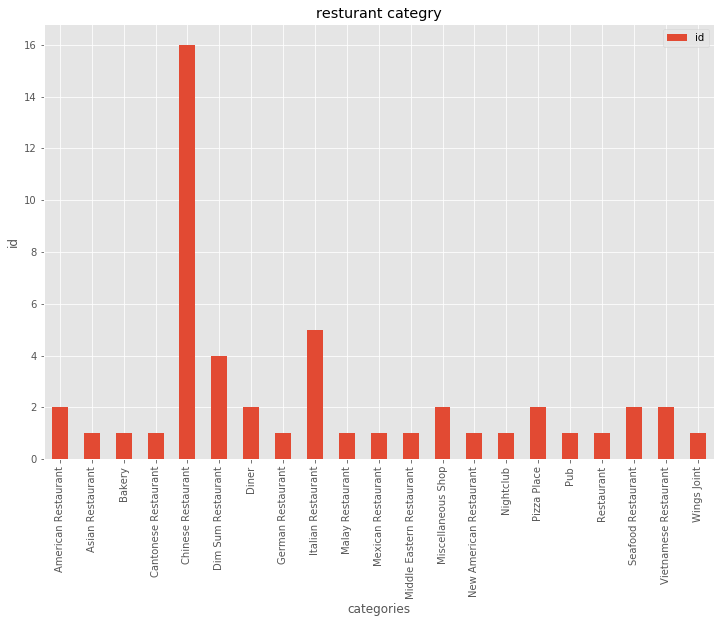

In [51]:
# step 2: plot data

df.groupby('categories').count().plot(kind='bar', figsize=(12, 8))
plt.xlabel('categories') # add to x-label to the plot
plt.ylabel('id') # add y-label to the plot
plt.title('resturant categry') # add title to the plot
plt.show()
